In [1]:
import sys   ###dpmcl（上の3つのセル）
sys.path.append('../scripts/')
from dp_policy_agent import *

In [15]:
def trial(animation):  ###qmdp1exec
    time_interval = 0.1
    world = PuddleWorld(30, time_interval, debug=not animation) 

    ##ランドマークの追加（意地悪な位置に）##
    m = Map()
    m.append_landmark(Landmark(1,4))
    m.append_landmark(Landmark(4,1))
    m.append_landmark(Landmark(-4,-4))
    world.append(m)
    
    ##ゴール・水たまりの追加（これは特に変更なし）##
    goal = Goal(-3,-3)
    puddles = [Puddle((-2, 0), (0, 2), 0.1), Puddle((-0.5, -2), (2.5, 1), 0.1)] 
    world.append(goal)
    world.append(puddles[0]) 
    world.append(puddles[1])
    
    ##ロボットを作る##
    init_pose = np.array([2.5, 2.5, 0]).T
    pf = Mcl(m, init_pose, 100)
    a = DpPolicyAgent(time_interval, pf, goal)
    r = Robot(init_pose, sensor=Camera(m), agent=a, color="red")

    world.append(r)
        
    world.draw()
    
    return a #a.total_reward+a.final_value, a.in_goal

<IPython.core.display.Javascript object>


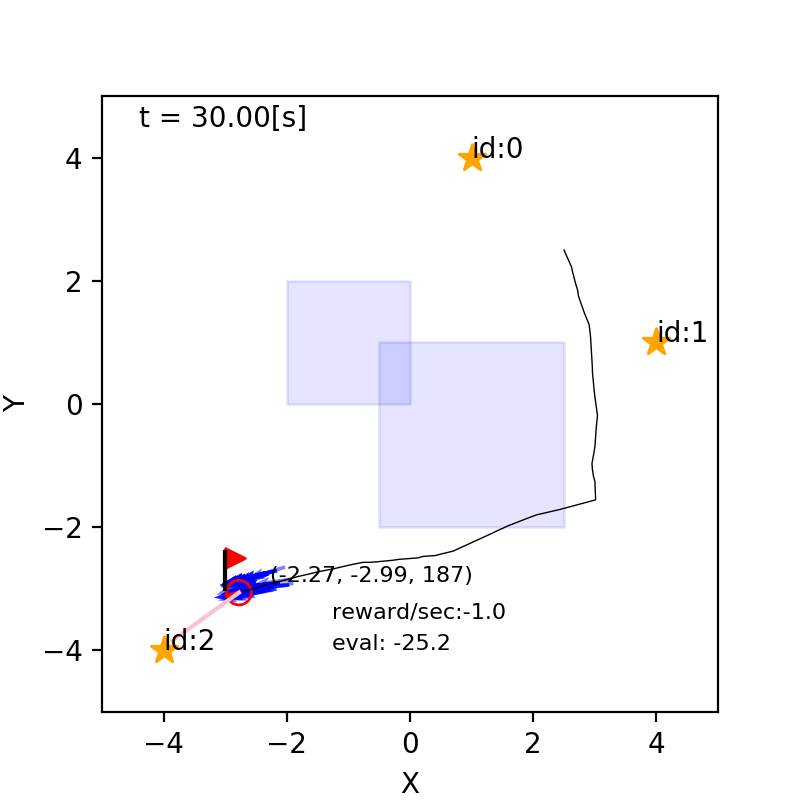

(0.0, False)

In [16]:
trial(True)

In [4]:
def trials(num):
    total = 0.0
    success = 0
    for i in range(num):
        reward, goal = trial(False)
        print(reward, goal)
        if goal: success += 1
        total += reward

    print(total/num, success)

In [5]:
-33.439000000000036 91

SyntaxError: invalid syntax (<ipython-input-5-c25217f0407f>, line 1)